# Default of credit card clients

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math


from scipy.io import arff
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Loading Data

In [112]:
dataset = pd.read_excel('datasets\Classification\credit_card_clients\credit_card_clients.xls',header=1)

In [135]:
dataset.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

## Data Analysis

In [136]:
print(np.count_nonzero(dataset==np.nan))

0


In [118]:
#dataset = dataset.drop(axis=1, columns="Unnamed: 0")
#dataset.reset_index()

data= dataset.iloc[:,1:] 
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [120]:
frequency = data["default payment next month"].value_counts()
print(frequency)
print("-------")

0    23364
1     6636
Name: default payment next month, dtype: int64
-------


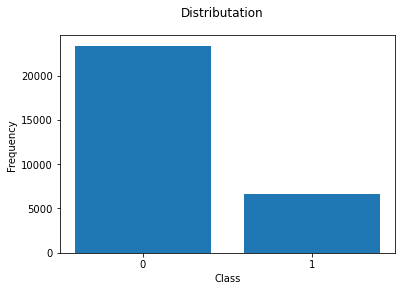

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

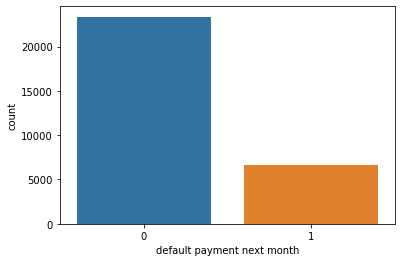

In [137]:

plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.bar( ("0","1"), frequency)
plt.suptitle("Distributation")
plt.show()

sns.countplot(x="default payment next month", data= data)

In [125]:
print(data.columns)
print(data.shape)
#data= pd.DataFrame(data)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
(30000, 24)


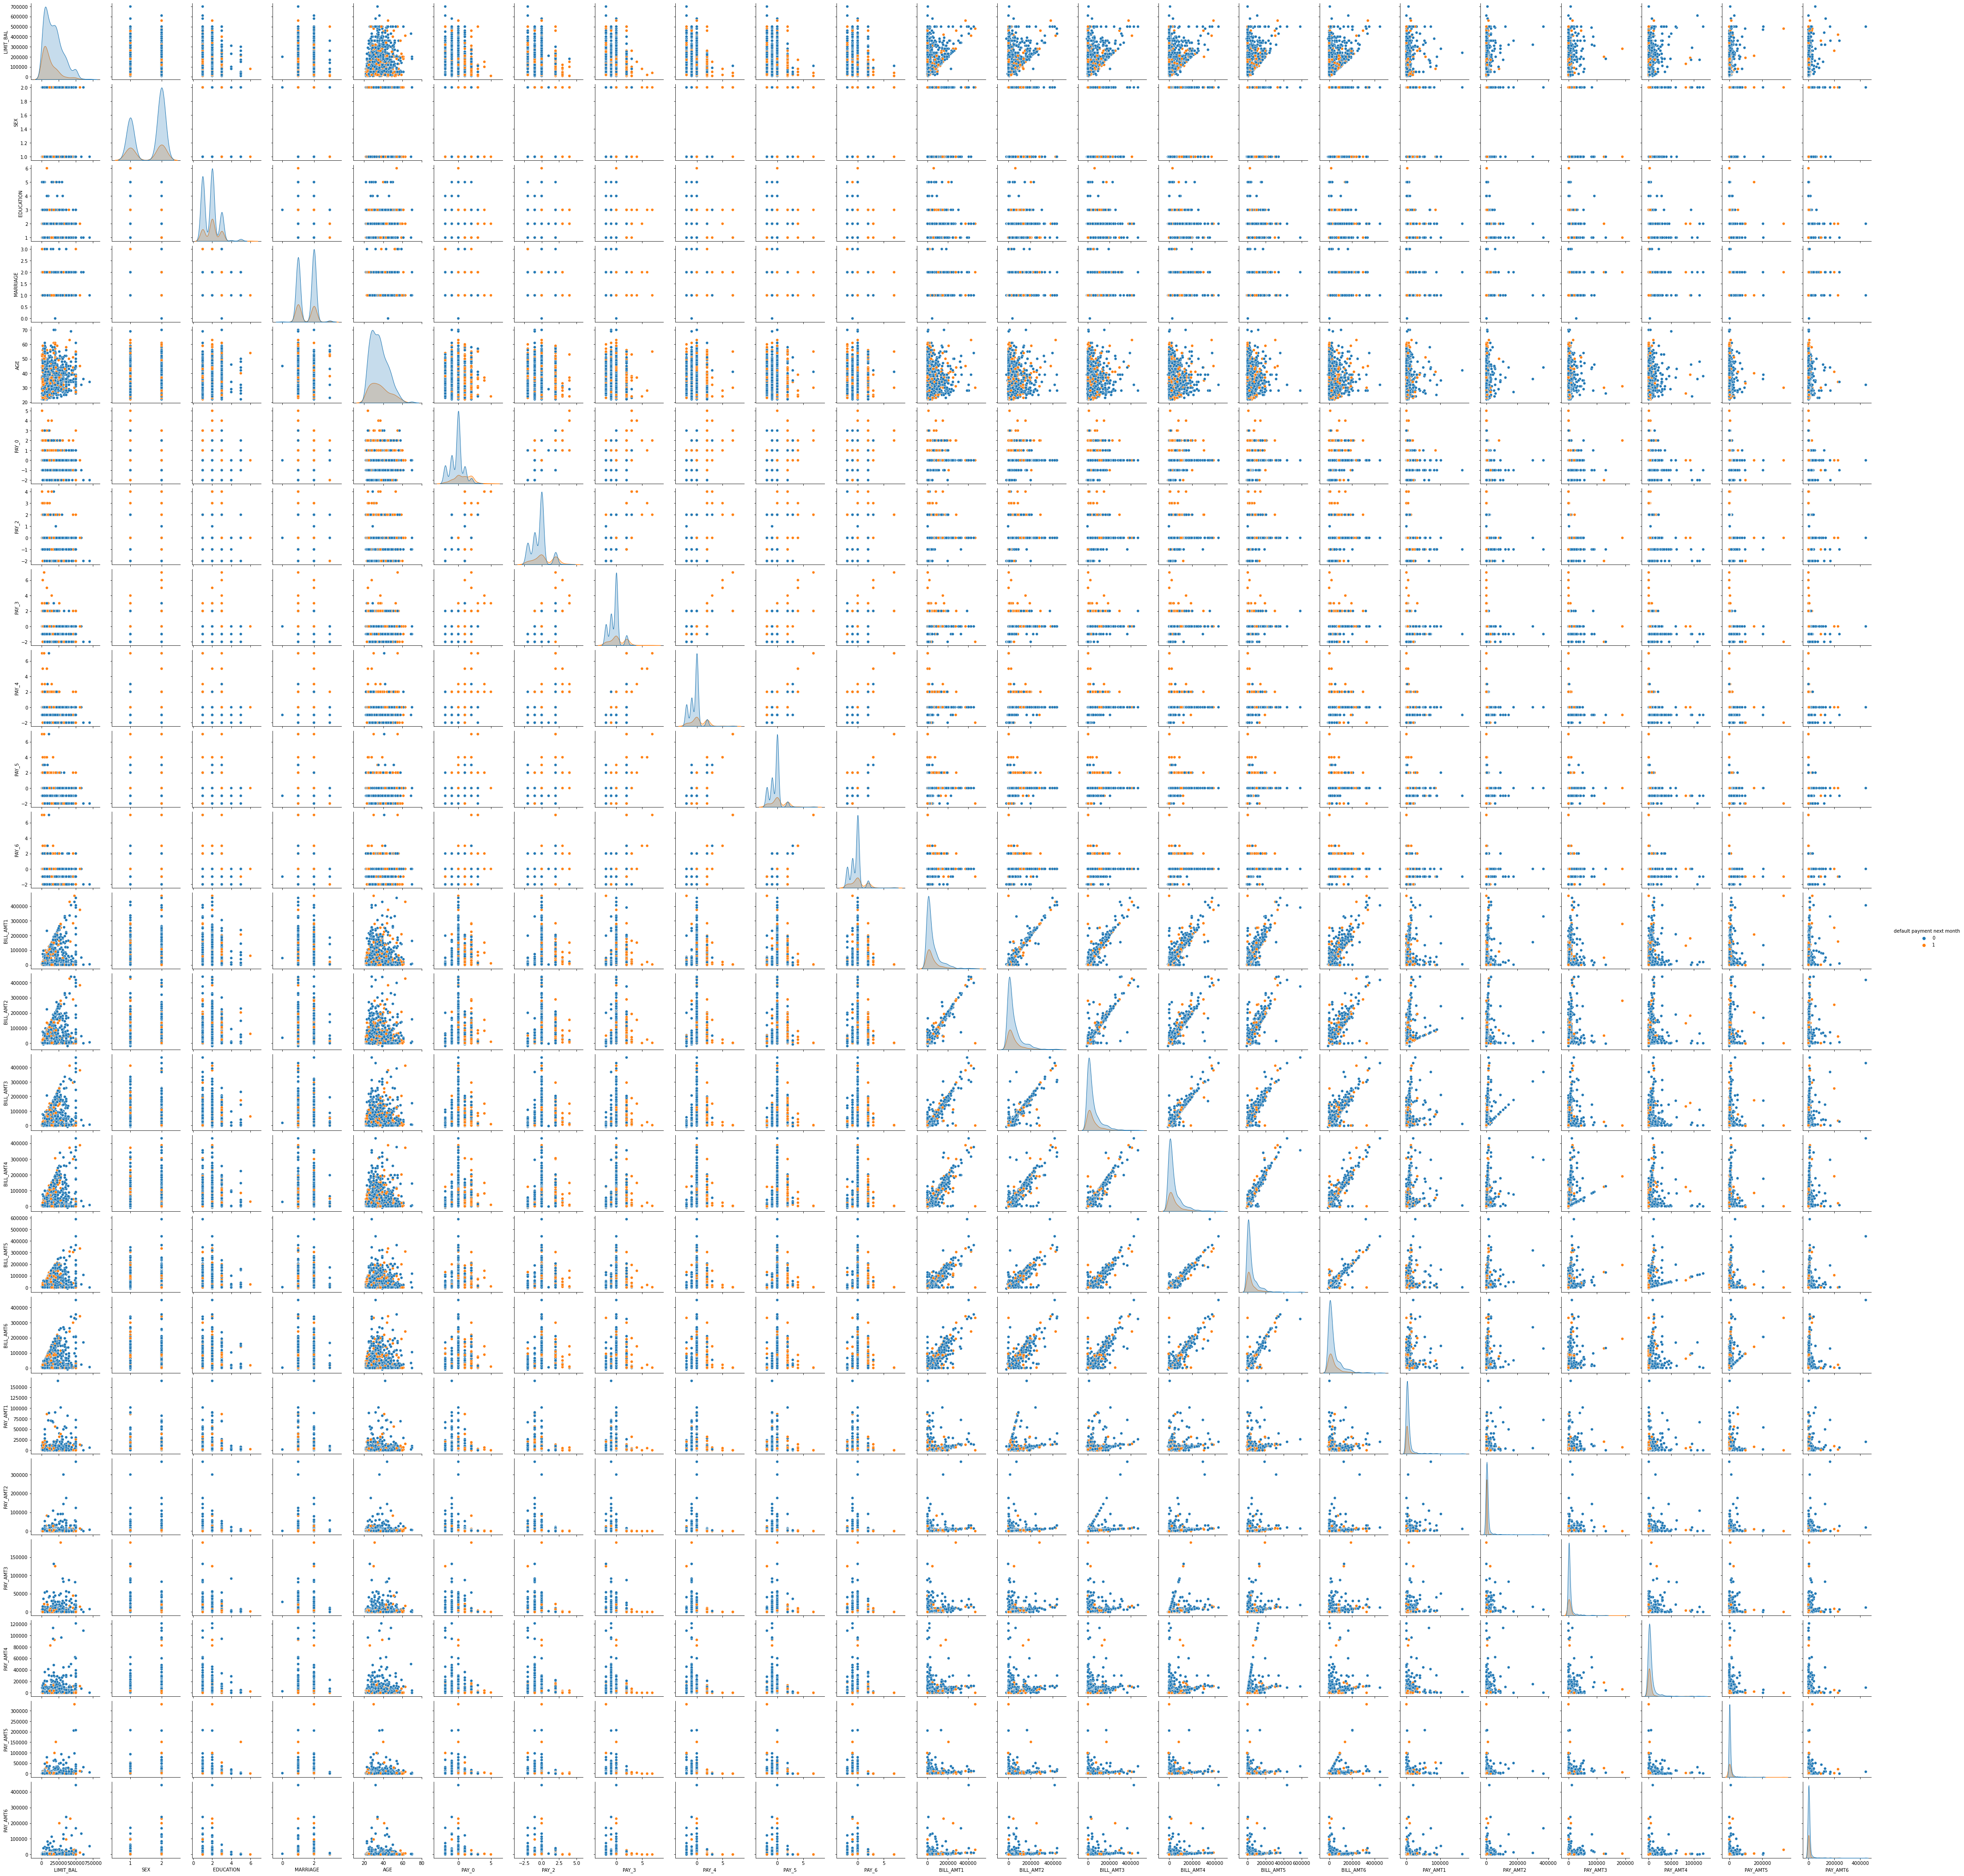

In [127]:
sns.pairplot(data.sample(1000), hue="default payment next month")



<AxesSubplot:>

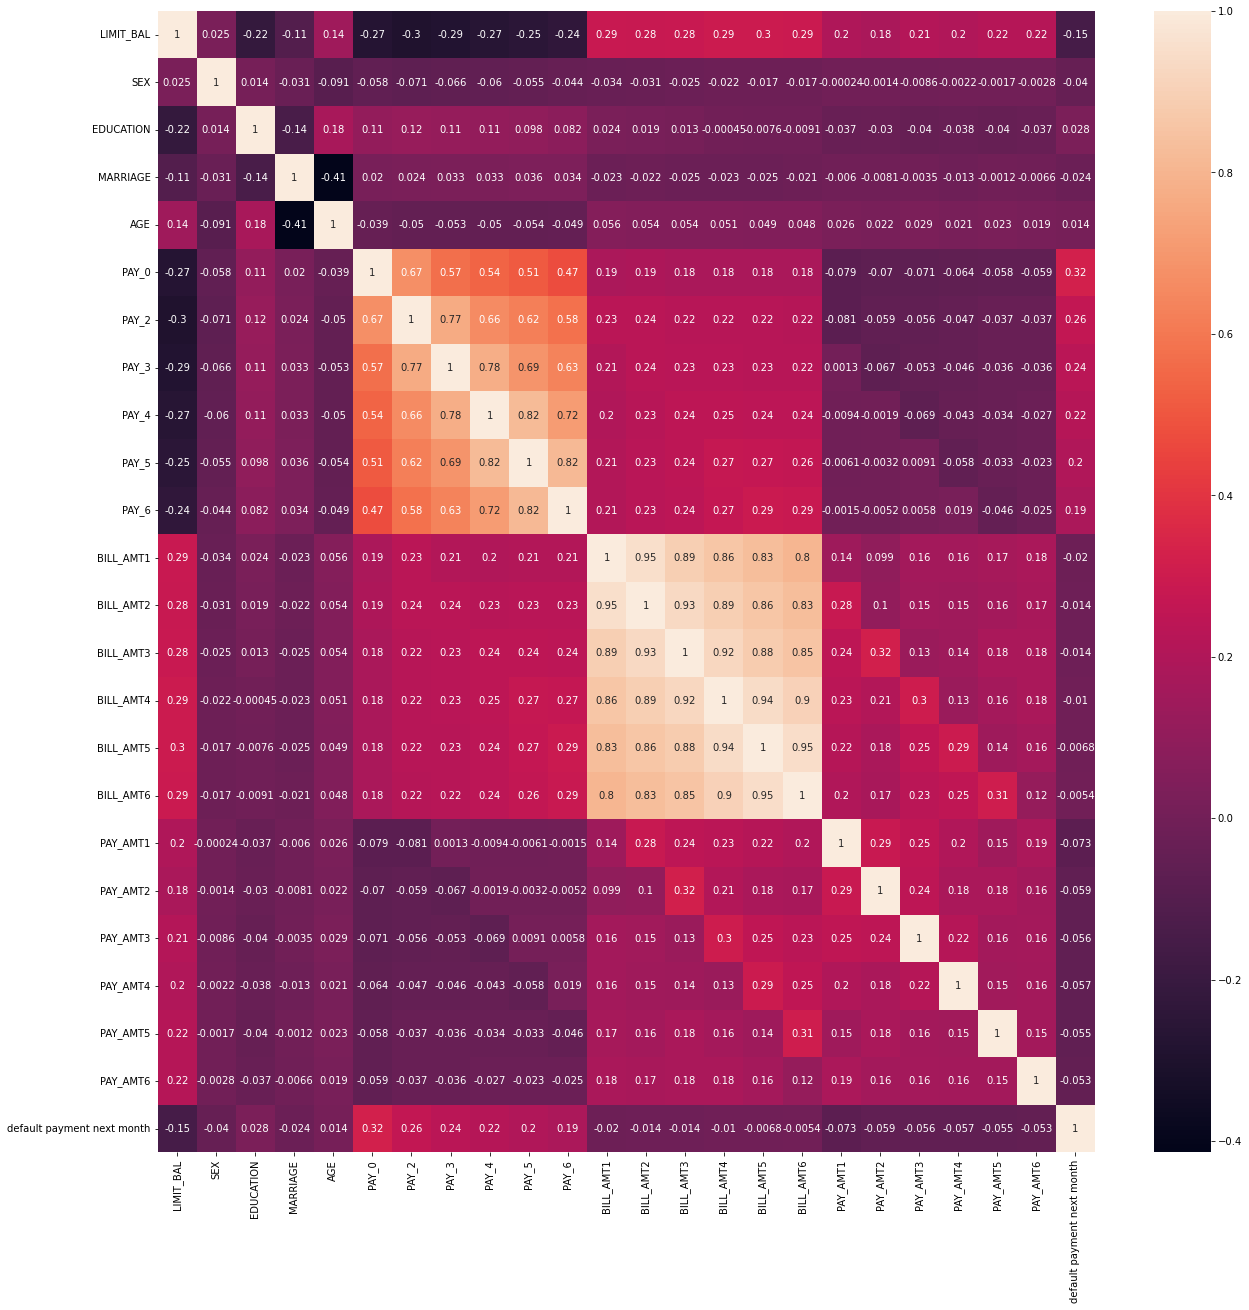

In [128]:
plt.figure(figsize=(21,21))
sns.heatmap(data.astype(float).corr(), annot =True)


array([[<AxesSubplot:xlabel='LIMIT_BAL', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_0', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_2', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_3', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_4', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_5', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_6', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT1', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT3', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT4', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT5', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT6', ylab

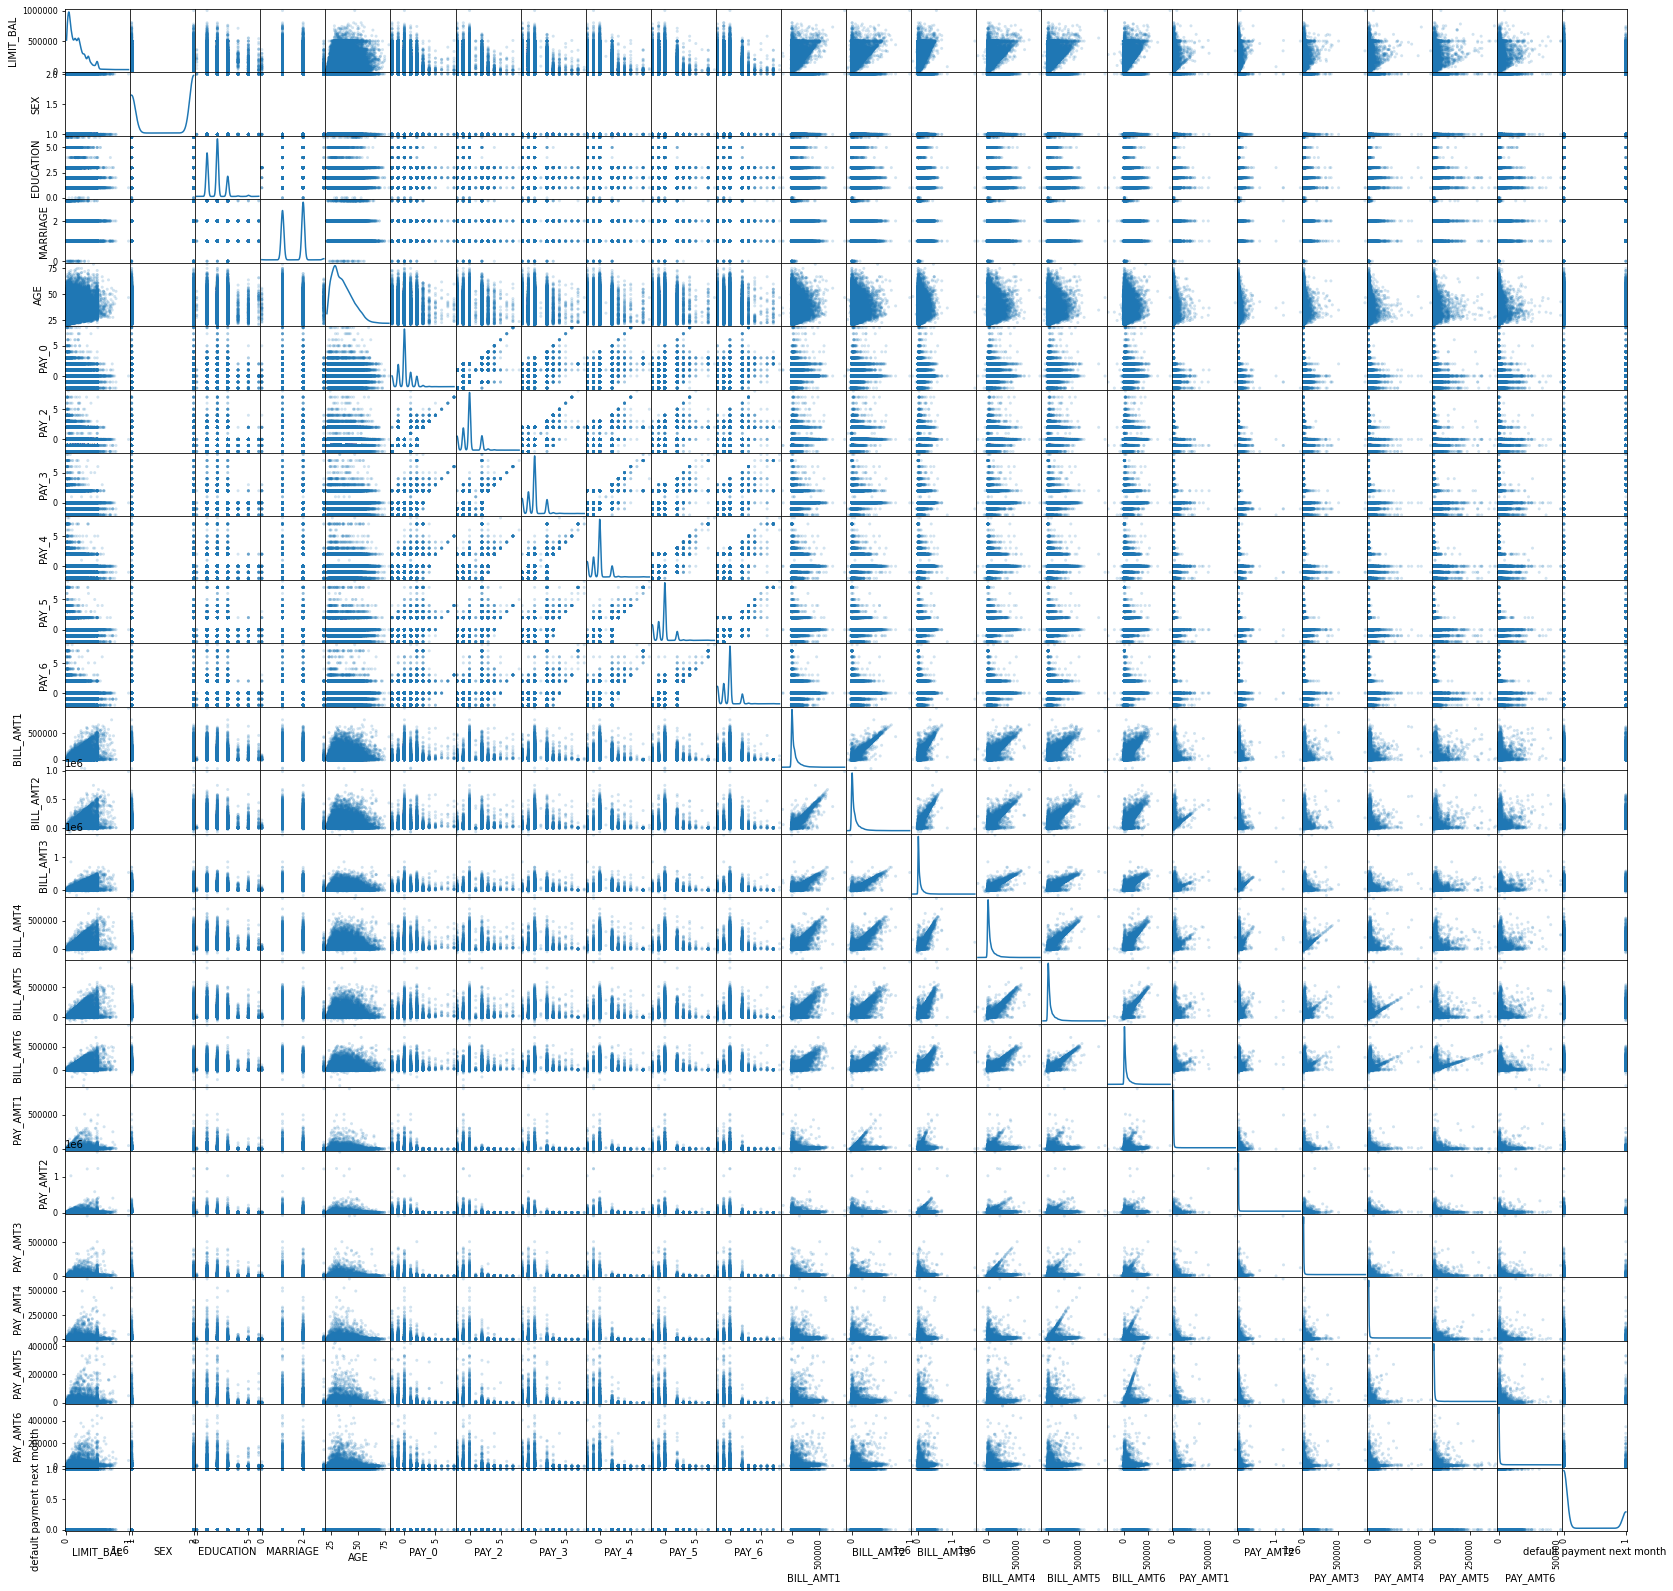

In [129]:
pd.plotting.scatter_matrix(data.astype(float),figsize=(28,28), alpha=0.2, diagonal='kde')

## Create train and test set

In [139]:

x = data.iloc[:,:-1]
y = data["default payment next month"]


In [140]:
X_train, X_test, y_train, y_test = train_test_split( x.astype(float), y.astype(float), test_size=0.2, random_state=0)


In [141]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 8225 to 9119
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  6000 non-null   float64
 1   SEX        6000 non-null   float64
 2   EDUCATION  6000 non-null   float64
 3   MARRIAGE   6000 non-null   float64
 4   AGE        6000 non-null   float64
 5   PAY_0      6000 non-null   float64
 6   PAY_2      6000 non-null   float64
 7   PAY_3      6000 non-null   float64
 8   PAY_4      6000 non-null   float64
 9   PAY_5      6000 non-null   float64
 10  PAY_6      6000 non-null   float64
 11  BILL_AMT1  6000 non-null   float64
 12  BILL_AMT2  6000 non-null   float64
 13  BILL_AMT3  6000 non-null   float64
 14  BILL_AMT4  6000 non-null   float64
 15  BILL_AMT5  6000 non-null   float64
 16  BILL_AMT6  6000 non-null   float64
 17  PAY_AMT1   6000 non-null   float64
 18  PAY_AMT2   6000 non-null   float64
 19  PAY_AMT3   6000 non-null   float64
 20  PAY_A

In [142]:
StScale = StandardScaler()
X_test = StScale.fit_transform(X_test)
X_train = StScale.fit_transform(X_train)

In [143]:
np.bincount(y_train)

array([18661,  5339], dtype=int64)

In [144]:
sm = SMOTE(random_state=40)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [145]:
np.bincount(y_train)

array([18661, 18661], dtype=int64)

## Logistic regression

In [146]:
clf = LogisticRegression(class_weight='balanced', random_state=0)
clf.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=0)

### Logistic regression Analysis

In [147]:
Logistic_predict = clf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      4703
         1.0       0.35      0.64      0.46      1297

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000

[[3190 1513]
 [ 465  832]]
0.6703333333333333
0.6970965193110764
0.6101161648834114


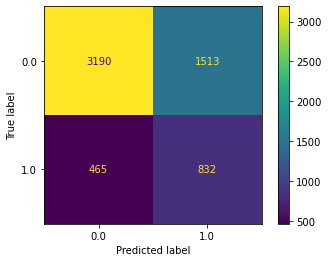

In [148]:
print (classification_report(y_test, Logistic_predict) )
print( confusion_matrix (y_test, Logistic_predict))
print(accuracy_score(y_test, Logistic_predict))
print(f1_score(y_test, Logistic_predict, average='weighted'))
print(f1_score(y_test, Logistic_predict, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, Logistic_predict)

## Support vector

In [ ]:
SVM = SVC()
print("hi")

In [90]:
parameters = {
    'C':[0.1,1,9,10, 11,50, 100,],
    'gamma': ['scale','auto',0.1, 0.01, 0.09, 0.001, 0.002, 0.005],
#     'Kernel': ['rbf', 'poly', 'sigmoid']
#     'degree':[2,3,4,5,6]
}
grid = RandomizedSearchCV(SVC(), param_distributions = parameters, verbose=2, cv=10, n_jobs =7)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'gamma': 0.1, 'C': 100}

In [91]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

### Support vector classification Analysis

In [92]:
svm_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81      4703
         1.0       0.37      0.48      0.42      1297

    accuracy                           0.71      6000
   macro avg       0.61      0.63      0.61      6000
weighted avg       0.74      0.71      0.72      6000

[[3636 1067]
 [ 677  620]]
0.7093333333333334
0.7220413698058779
0.6110578512789893


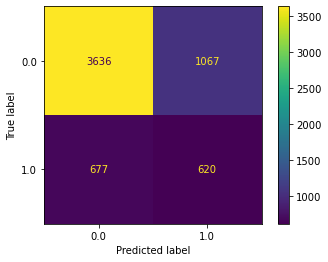

In [93]:
print (classification_report(y_test, svm_predictions) )
print( confusion_matrix (y_test, svm_predictions))
print(accuracy_score(y_test, svm_predictions))
print(f1_score(y_test, svm_predictions, average='weighted'))
print(f1_score(y_test, svm_predictions, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)

In [97]:
grid.score(X_train, y_train )

0.896200632334816

## Decision tree

In [98]:
tree = DecisionTreeClassifier( class_weight = "balanced")
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

### Decision tree Analysis

In [100]:
tree_predictions = tree.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.81      0.11      0.19      4703
         1.0       0.22      0.91      0.35      1297

    accuracy                           0.28      6000
   macro avg       0.52      0.51      0.27      6000
weighted avg       0.68      0.28      0.22      6000

[[ 498 4205]
 [ 116 1181]]
0.2798333333333333
0.22323121190210188
0.27037888262716286


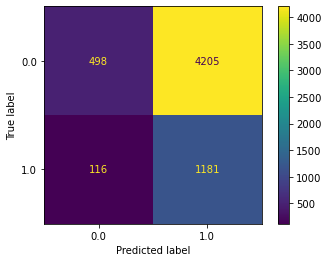

In [101]:
print (classification_report(y_test, tree_predictions) )
print( confusion_matrix (y_test, tree_predictions))
print(accuracy_score(y_test, tree_predictions))
print(f1_score(y_test, tree_predictions, average='weighted'))
print(f1_score(y_test, tree_predictions, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions)

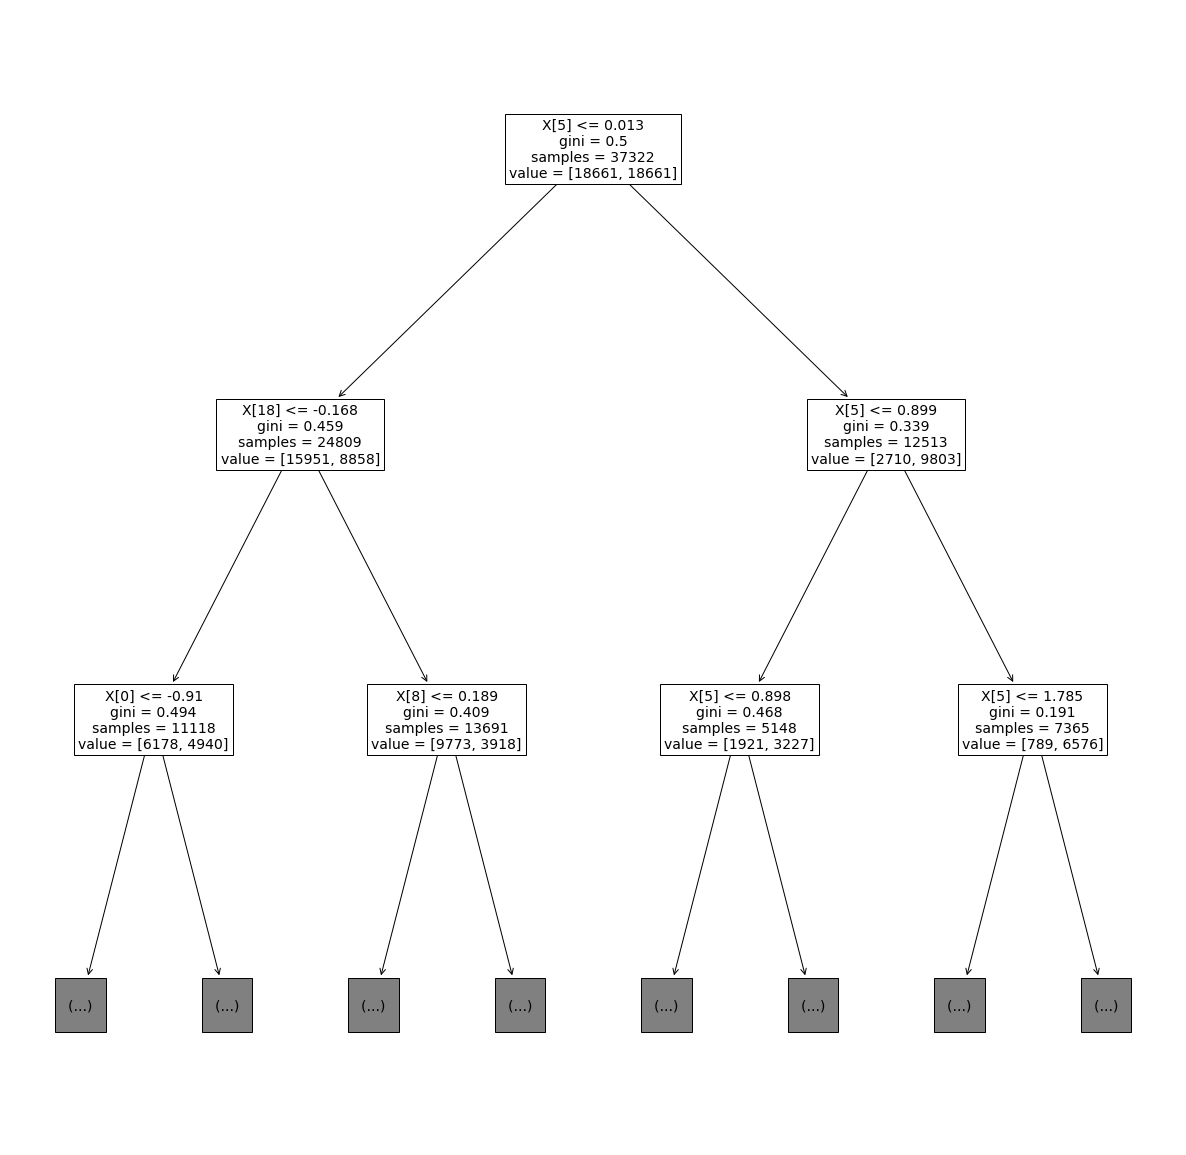

In [102]:
plt.figure(figsize=(21,21))
plot_tree(tree, max_depth = 2, fontsize=14);